In [1]:
from __future__ import division
import numpy as np
import math
import matplotlib.mlab as mlab
import kernelClassifier as kC
reload(kC) 
from sklearn import linear_model, model_selection
import matplotlib.pyplot as plt
import sys, os 
from scipy.stats import norm
#Random seed.
np.random.seed(432)

In [2]:
############################ Code generic to all data models: ########################################################
class storeObjectiveFunction:
    def __init__(self,clf):
        self.clf=clf
        self.values=[]
        
    def update(self,weights):
        self.values.append(self.clf.objectiveVal(weights))
        
    def getVals(self):
        return self.values

def classify(X_vals,y_vals,clf):
    store =storeObjectiveFunction(clf)
    clf.train(X_vals,y_vals,0,callback=store.update)
    return store   


def returnSetup(theta_value, generator_marginal, generator_thetaGiven, n_samples):
    #Sample from the marginal.
    marginal_samples=generator_marginal(n_samples)

    #Sample from the given class.
    theta_samples=generator_thetaGiven(theta_value,n_samples)
    
    #Setup the classification task.##################################
    X_class1 = theta_samples
    X_class2= marginal_samples
        
    y_vals_class1 = np.zeros((len(X_class1),1))+1
    y_vals_class2 = np.zeros((len(X_class2),1))-1

    y_vals = np.vstack([y_vals_class1,y_vals_class2])
    X_vals = np.vstack([X_class1,X_class2])

    datapoints=np.hstack([X_vals,y_vals])
    np.random.shuffle(datapoints)

    X_vals=datapoints[:,0:datapoints.shape[1]-1]
    y_vals=datapoints[:,datapoints.shape[1]-1]
    ####################################################################
    
    return (X_vals,y_vals)
##########################################################################################################################

### GAUSSIAN TOY EXAMPLE ###


In [3]:
#Takes a single value x and returns a b dimensional basis vector [1,x,x^2,...x^b]
#Generates n 1-D samples from a gaussian ditribution with given mean.
def generator_thetaGiven(mu,n_samples):
    X = np.random.normal(mu,3,(n_samples,1))
    return X

#Generates n 1-D samples from gaussian ditributions, assuming a uniform dist. over means between [-5,5]
def generator_marginal(n_samples):
    mu= np.random.uniform(-20,20,(n_samples,1));
    X = np.random.normal(mu,3,(n_samples,1));
    return X

#### Setup classification problem ####

In [4]:
############################################# Algorithm1 ####################################################################
#Disable print statement -- The estimate Probabilities function prints a lot of info.
#sys.stdout = open(os.devnull, 'w')

#Observed data
observed_data=np.array([[0]])
#observed_data=np.random.normal(2.3,3,(1,1))

#Number of samples to be created by each generator for classification.
n_samples=1000

#Calculate posterior for mu_values 
mu_value1= 0
mu_value2= 4
#Get  classification setup
(X_vals1,y_vals1) = returnSetup(mu_value1, generator_marginal, generator_thetaGiven, n_samples)
(X_vals2,y_vals2) = returnSetup(mu_value2, generator_marginal, generator_thetaGiven, n_samples)

## With Scaling ##

##### RBF width  0.3 #####

With scaling
Training kernel logistic regression model...

COMPLETED. Running Time: 12.007 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 11.464 seconds 


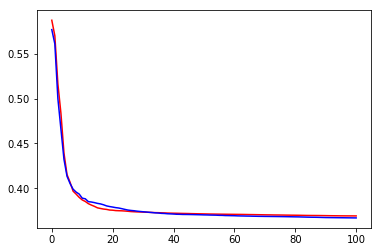

In [7]:
print('With scaling')
#Uses my own kernel classifier, with linear kernel.
kRBF = lambda X1,X2: kC.kernelRBF(X1,X2,0.3)
clf=kC.KernelClassifier(kRBF,withPCA=False)
store1 = classify(X_vals1,y_vals1,clf)
store2 = classify(X_vals2,y_vals2,clf) 
#Plot results
plt.clf()
plt.plot(store1.getVals(),'r-') #mu value 0 
plt.plot(store2.getVals(),'b-') #mu value 4
plt.show()

##### RBF width  0.5 #####

With scaling
Training kernel logistic regression model...

COMPLETED. Running Time: 11.940 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 11.932 seconds 


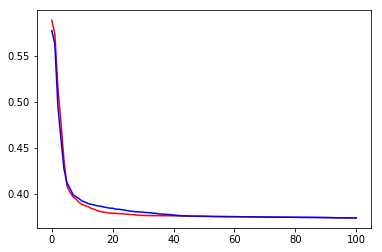

In [8]:
print('With scaling')
#Uses my own kernel classifier, with linear kernel.
kRBF = lambda X1,X2: kC.kernelRBF(X1,X2,0.5)
clf=kC.KernelClassifier(kRBF,withPCA=False)
store1 = classify(X_vals1,y_vals1,clf)
store2 = classify(X_vals2,y_vals2,clf) 
#Plot results
plt.clf()
plt.plot(store1.getVals(),'r-') #mu value 0 
plt.plot(store2.getVals(),'b-') #mu value 4
plt.show()

##### RBF width 0.7 #####

With scaling
Training kernel logistic regression model...

COMPLETED. Running Time: 11.402 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 10.839 seconds 


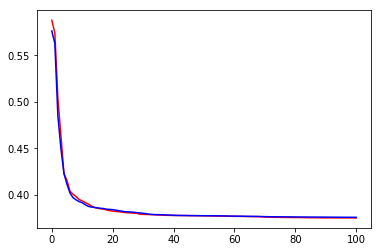

In [9]:
print('With scaling')
#Uses my own kernel classifier, with linear kernel.
kRBF = lambda X1,X2: kC.kernelRBF(X1,X2,0.7)
clf=kC.KernelClassifier(kRBF,withPCA=False)
store1 = classify(X_vals1,y_vals1,clf)
store2 = classify(X_vals2,y_vals2,clf) 
#Plot results
plt.clf()
plt.plot(store1.getVals(),'r-') #mu value 0 
plt.plot(store2.getVals(),'b-') #mu value 4
plt.show()

### No scaling ###

##### RBF width 0.3 #####

No scaling
Training kernel logistic regression model...

COMPLETED. Running Time: 11.278 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 11.522 seconds 


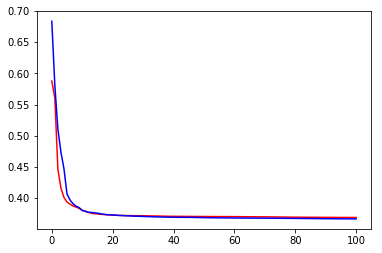

In [11]:
print('No scaling')
#Uses my own kernel classifier, with linear kernel.
kRBF = lambda X1,X2: kC.kernelRBF(X1,X2,0.3)
clf=kC.KernelClassifier(kRBF,withScaling=False,withPCA=False)
store1 = classify(X_vals1,y_vals1,clf)
store2 = classify(X_vals2,y_vals2,clf) 
#Plot results
plt.clf()
plt.plot(store1.getVals(),'r-') #mu value 0 
plt.plot(store2.getVals(),'b-') #mu value 4
plt.show()

##### RBF width 0.5 #####

No scaling
Training kernel logistic regression model...

COMPLETED. Running Time: 12.256 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 12.468 seconds 


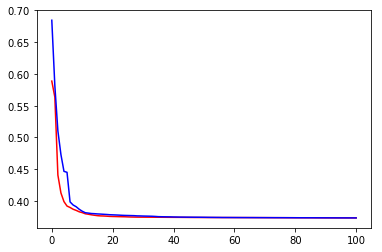

In [12]:
print('No scaling')
#Uses my own kernel classifier, with linear kernel.
kRBF = lambda X1,X2: kC.kernelRBF(X1,X2,0.5)
clf=kC.KernelClassifier(kRBF,withScaling=False,withPCA=False)
store1 = classify(X_vals1,y_vals1,clf)
store2 = classify(X_vals2,y_vals2,clf) 
#Plot results
plt.clf()
plt.plot(store1.getVals(),'r-') #mu value 0 
plt.plot(store2.getVals(),'b-') #mu value 4
plt.show()

##### RBF width 0.7 #####

No scaling
Training kernel logistic regression model...

COMPLETED. Running Time: 10.539 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 10.954 seconds 


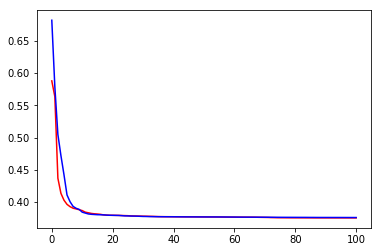

In [13]:
print('No scaling')
#Uses my own kernel classifier, with linear kernel.
kRBF = lambda X1,X2: kC.kernelRBF(X1,X2,0.7)
clf=kC.KernelClassifier(kRBF,withScaling=False,withPCA=False)
store1 = classify(X_vals1,y_vals1,clf)
store2 = classify(X_vals2,y_vals2,clf) 
#Plot results
plt.clf()
plt.plot(store1.getVals(),'r-') #mu value 0 
plt.plot(store2.getVals(),'b-') #mu value 4
plt.show()